### We analyze a bank transaction dataset. The dataset covers each customers transactions for every day in 2016 that happened in India. 

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
dfz = pd.read_csv('C:\\Users\\eleni\\Desktop\\bank_transactions.csv')

In [3]:
dfz.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


Dataset preprocessing

In [5]:
dfz.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [6]:
df = dfz.sample(frac = 0.1, random_state=2050)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104857 entries, 498122 to 258669
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            104857 non-null  object 
 1   CustomerID               104857 non-null  object 
 2   CustomerDOB              104522 non-null  object 
 3   CustGender               104746 non-null  object 
 4   CustLocation             104835 non-null  object 
 5   CustAccountBalance       104614 non-null  float64
 6   TransactionDate          104857 non-null  object 
 7   TransactionTime          104857 non-null  int64  
 8   TransactionAmount (INR)  104857 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 8.0+ MB


In [7]:
df['TransactionID'] = df['TransactionID'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(str)

In [8]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104857 entries, 498122 to 258669
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            104857 non-null  object        
 1   CustomerID               104857 non-null  object        
 2   CustomerDOB              104522 non-null  datetime64[ns]
 3   CustGender               104746 non-null  object        
 4   CustLocation             104835 non-null  object        
 5   CustAccountBalance       104614 non-null  float64       
 6   TransactionDate          104857 non-null  datetime64[ns]
 7   TransactionTime          104857 non-null  int64         
 8   TransactionAmount (INR)  104857 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.0+ MB


In [10]:
df.sort_values('CustomerDOB', ascending=True).head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
924607,T924608,C3336582,1800-01-01,M,BADDI,5082.59,2016-11-09,132037,1500.00
926792,T926793,C3429031,1800-01-01,M,DELHI,32898.35,2016-11-09,91742,25.54
14878,T14879,C6239153,1800-01-01,NaN,NAVI MUMBAI,603.00,2016-09-26,163122,1494.00
295002,T295003,C1023981,1800-01-01,M,NOIDA,1937026.56,2016-11-08,201338,4810.00
568818,T568819,C6479423,1800-01-01,F,MUMBAI,582.72,2016-08-22,195109,490.00


We notice that the conversion to datetime for CustomerDOB produces errors because for python time starts at 1970. We saw that the first DOB of the customers is 1930 so we will make a new column for the year of birth of each customer and then we will fix the dates.

We do not need the CustomerDOB anymore

In [11]:
def date_convert(x):
    if (x.year > 2022):
        year = x.year - 100
    else:
        year = x.year
    return year

df['CustomerDOB'] = df['CustomerDOB'].apply(date_convert)

In [12]:
df = df[df['CustomerDOB']>1900]

In [13]:
df.sort_values('CustomerDOB', ascending=True).head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
890923,T890924,C8515033,1926.0,M,NEW DELHI,88439.77,2016-07-09,161851,2600.00
677896,T677897,C9015087,1926.0,M,NEW DELHI,88439.77,2016-08-28,125656,2351.32
795263,T795264,C1941434,1927.0,M,BANGALORE,386783.65,2016-05-09,121531,1071.00
797653,T797654,C4133337,1927.0,F,SAS NAGAR,524367.37,2016-05-09,135244,3200.00
451353,T451354,C4342824,1927.0,M,THANE WEST,847769.30,2016-08-16,195455,485.00


### What is the average amount each customer has, based on their gender

C:\Users\eleni\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


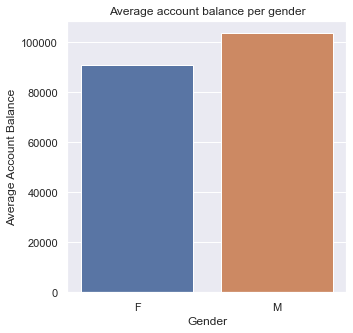

In [14]:
data0 = df.groupby('CustGender')['CustAccountBalance'].mean()
x = data0.keys()
y = data0
plt.figure(figsize=[5,5])
sns.set_theme()
chart = sns.barplot(x,y)
plt.title('Average account balance per gender')
plt.xlabel('Gender')
plt.ylabel('Average Account Balance')
chart.set_xticklabels(chart.get_xticklabels())
None

### What is the average amount each customer has, based on their age

We need to categorize each customer based on the decade they were born. In order to do this we change the variable from date to a categorical one.

In [15]:
cut_points = [1930, 1960, 1990, 2023]
label_names = ['Over65', 'Adults', 'Under35']
df['CustomerCat'] = pd.cut(df['CustomerDOB'], cut_points, labels=label_names)

In [16]:
df['CustomerCat'].unique()

['Adults', 'Under35', 'Over65', NaN]
Categories (3, object): ['Over65' < 'Adults' < 'Under35']

C:\Users\eleni\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


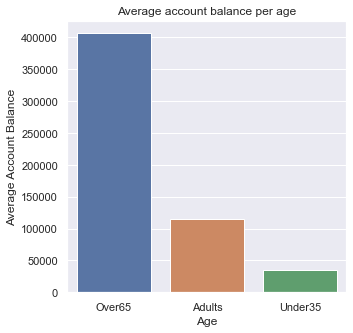

In [17]:
data1 = df.groupby('CustomerCat')['CustAccountBalance'].mean()
x = data1.keys()
y = data1
plt.figure(figsize=[5,5])
sns.set_theme()
chart = sns.barplot(x,y)
plt.title('Average account balance per age')
plt.xlabel('Age')
plt.ylabel('Average Account Balance')
chart.set_xticklabels(chart.get_xticklabels())
None

### What is the average amount each gender has, based on their age

In [18]:
table = pd.pivot_table(df, values='CustAccountBalance', index=['CustomerCat','CustGender'], aggfunc=np.mean, fill_value=0)
table = table.reset_index()
table

,CustomerCat,CustGender,CustAccountBalance
0,Over65,F,291978.794234
1,Over65,M,460586.077879
2,Adults,F,109175.943148
3,Adults,M,117713.454681
4,Under35,F,36163.855633
5,Under35,M,33387.654892


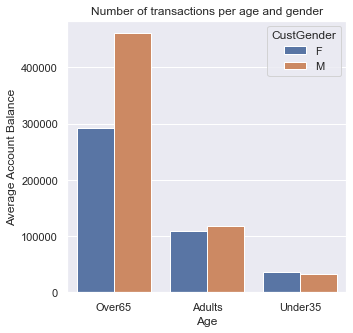

In [19]:
plt.figure(figsize=[5,5])
chart = sns.barplot(x = 'CustomerCat', y= 'CustAccountBalance', hue = 'CustGender', data=table)
plt.title('Number of transactions per age and gender')
plt.xlabel('Age')
plt.ylabel('Average Account Balance')
chart.set_xticklabels(chart.get_xticklabels())
None

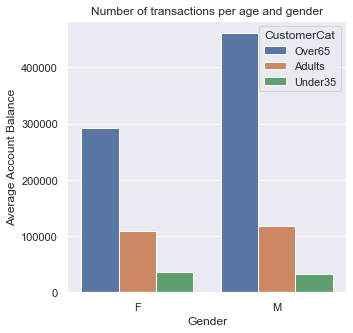

In [20]:
plt.figure(figsize=[5,5])
chart = sns.barplot(x = 'CustGender', y= 'CustAccountBalance', hue = 'CustomerCat', data=table)
plt.title('Number of transactions per age and gender')
plt.xlabel('Gender')
plt.ylabel('Average Account Balance')
chart.set_xticklabels(chart.get_xticklabels())
None

### How many transactions happened every month of 2016

In [21]:
df2 = df.copy()
df2['TransMonth'] = df2['TransactionDate'].dt.month

C:\Users\eleni\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


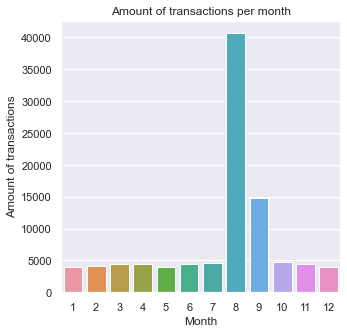

In [22]:
data = df2.groupby('TransMonth')['TransactionAmount (INR)'].count()
x = data.keys()
y = data
plt.figure(figsize=[5,5])
chart = sns.barplot(x,y)
plt.title('Amount of transactions per month')
plt.xlabel('Month')
plt.ylabel('Amount of transactions')
chart.set_xticklabels(chart.get_xticklabels())
None

### What are the relative transactions based on the balance of the account

In [23]:
df3 = df.copy()
df3['BalanceCat'] = pd.cut(df3['CustAccountBalance'],4, labels=['lowest whisker', 'lower quartile', 'upper quartile', 'upper whisker'])

In [24]:
df3['BalanceCat'].dropna().unique()

['lowest whisker', 'lower quartile', 'upper whisker', 'upper quartile']
Categories (4, object): ['lowest whisker' < 'lower quartile' < 'upper quartile' < 'upper whisker']

C:\Users\eleni\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


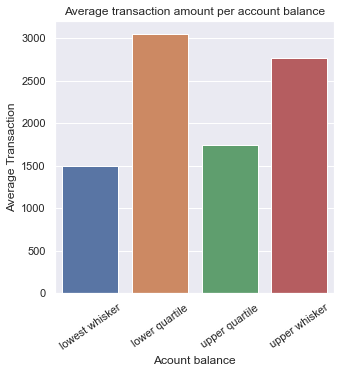

In [25]:
data = df3.groupby('BalanceCat')['TransactionAmount (INR)'].mean()
x = data.keys()
y = data
plt.figure(figsize=[5,5])
sns.set_theme()
chart = sns.barplot(x,y)
plt.title('Average transaction amount per account balance')
plt.xlabel('Acount balance')
plt.ylabel('Average Transaction')
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
None

# RFM

In [26]:
dfz['TransactionDate'] = pd.to_datetime(dfz['TransactionDate'])
dfz['TransactionID'] = dfz['TransactionID'].astype(str)
dfz['CustomerID'] = dfz['CustomerID'].astype(str)

In [27]:
snapshot_date = dfz['TransactionDate'].max() + timedelta(days=1)
print(snapshot_date)

2016-12-10 00:00:00


In [28]:
data_process = dfz.groupby(['CustomerID']).agg({
        'TransactionDate': lambda x: (snapshot_date - x.max()).days,
        'TransactionID': 'count',
        'TransactionAmount (INR)': 'sum'})

In [29]:
data_process.rename(columns={'TransactionDate': 'Recency',
                         'TransactionID': 'Frequency',
                         'TransactionAmount (INR)': 'MonetaryValue'}, inplace=True)


In [30]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'].rank(method='first'), q=4, labels=f_labels)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)
# Create new columns R,F and M 
rfm = data_process.assign(R = r_groups.values, F = f_groups.values,M = m_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
C1010011,75,2,5106.0
C1010012,118,1,1499.0
C1010014,155,2,1455.0
C1010018,86,1,30.0
C1010024,114,1,5000.0


In [31]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm['RFM_Score'].head()

CustomerID
C1010011    12
C1010012     6
C1010014     8
C1010018     6
C1010024     7
Name: RFM_Score, dtype: int64

In [32]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Elite Customers'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Very Good Customers'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Good Customers'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Average Customers'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Less Than Average Customers'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Relatively Inactive Customers'
    else:
        return 'Inactive Customers'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the CustomerID level
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
C1010011,75,2,5106.0,4,4,4,12,Elite Customers
C1010012,118,1,1499.0,2,1,3,6,Average Customers
C1010014,155,2,1455.0,1,4,3,8,Very Good Customers
C1010018,86,1,30.0,4,1,1,6,Average Customers
C1010024,114,1,5000.0,2,1,4,7,Good Customers


In [33]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency MonetaryValue        
                                 mean      mean          mean   count
RFM_Level                                                            
Average Customers               155.2       1.0         884.6  141806
Elite Customers                  83.1       1.5        3553.3  283316
Good Customers                  131.9       1.0        1355.5  152687
Inactive Customers              253.3       1.0          97.0   18361
Less Than Average Customers     182.5       1.0         303.8   97548
Relatively Inactive Customers   208.9       1.0         175.9   50642
Very Good Customers             114.4       1.1        1939.6  139905

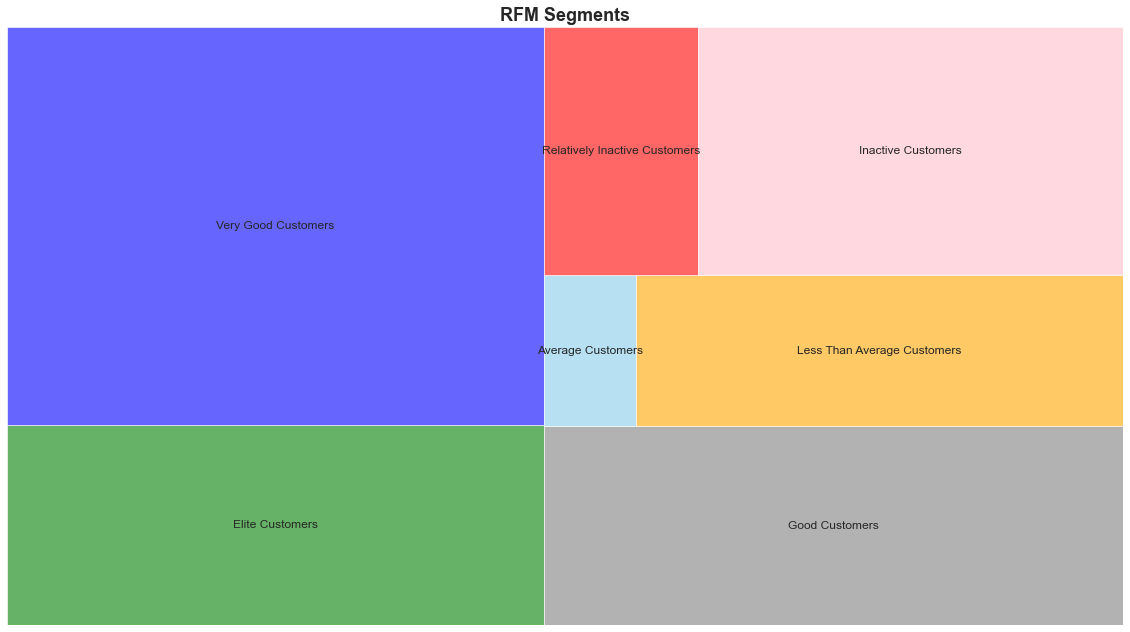

In [34]:
import squarify
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 11)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Elite Customers',
                     'Very Good Customers',
                     'Good Customers',
                     'Average Customers',
                     'Less Than Average Customers', 
                     'Relatively Inactive Customers', 
                     'Inactive Customers'],
              color=["green","blue", "grey",'skyblue','orange',"red",'pink'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()